In [3]:
import clmm
import numpy as np
import matplotlib.pyplot as plt
from clmm import Cosmology
import h5py

Keys: ['catalog', 'index', 'provenance']
Keys: ['cluster_id', 'cluster_index', 'cross_comp', 'distance_arcmin', 'g1', 'g2', 'source_index', 'tangential_comp', 'weight']


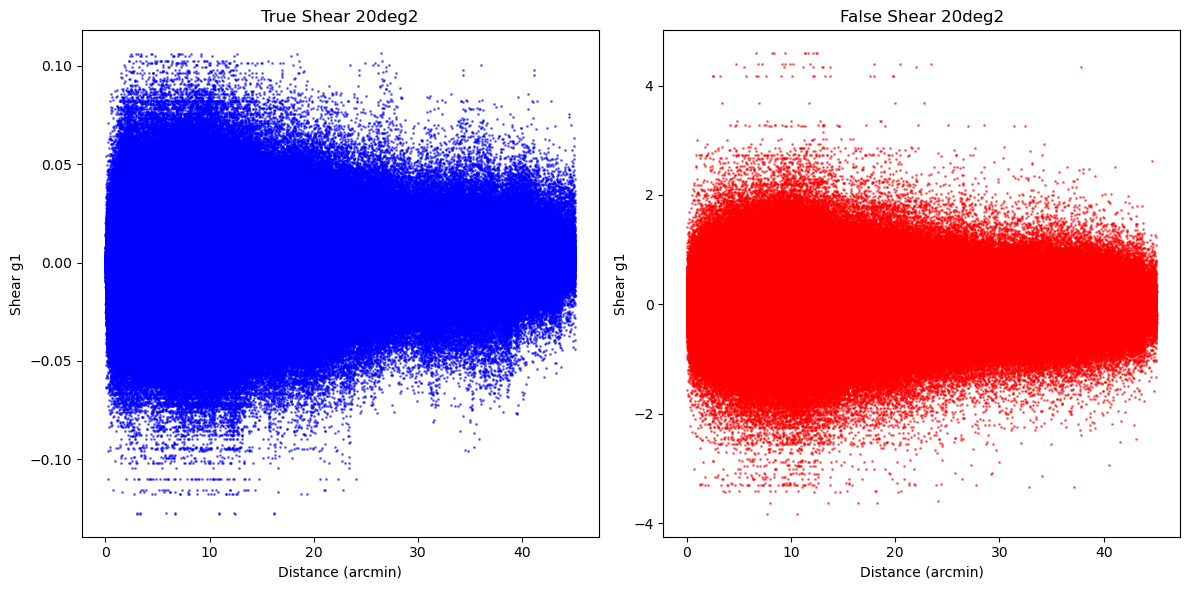

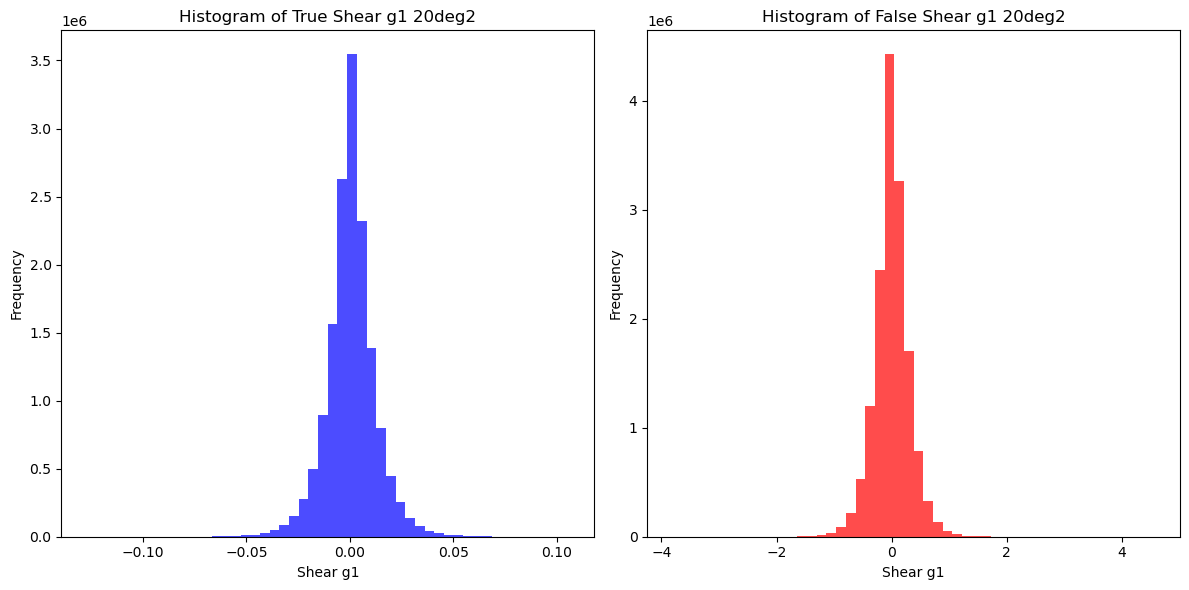

In [2]:
false_shear = '/sps/lsst/groups/clusters/cl_pipeline_project/TXPipe_data/cosmodc2/shear_test/outputs-20deg2-CL-False-Shear/cluster_shear_catalogs.hdf5'
true_shear = '/sps/lsst/groups/clusters/cl_pipeline_project/TXPipe_data/cosmodc2/shear_test/outputs-20deg2-CL-True-Shear/cluster_shear_catalogs.hdf5'



with h5py.File(true_shear, 'r') as f:
    # List all groups/datasets
    print("Keys:", list(f.keys()))
    
    # Access a dataset
    true_g1 = np.array(f['index']['g1'])
    true_distance = np.array(f['index']['distance_arcmin'])


with h5py.File(false_shear, 'r') as f:
    # List all groups/datasets
    print("Keys:", list(f['index'].keys()))
    
    # Access a dataset
    false_g1 = np.array(f['index']['g1'])
    false_distance = np.array(f['index']['distance_arcmin'])


# Convert to numpy arrays

# Plotting
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(true_distance, true_g1, s=1, color='blue', alpha=0.5)
plt.title('True Shear 20deg2')
plt.xlabel('Distance (arcmin)')
plt.ylabel('Shear g1')
plt.subplot(1, 2, 2)
plt.scatter(false_distance, false_g1, s=1, color='red', alpha=0.5)
plt.title('False Shear 20deg2')
plt.xlabel('Distance (arcmin)')
plt.ylabel('Shear g1')
plt.tight_layout()
plt.show()
# Plotting the histograms
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(true_g1, bins=50, color='blue', alpha=0.7)
plt.title('Histogram of True Shear g1 20deg2')
plt.xlabel('Shear g1')
plt.ylabel('Frequency')
plt.subplot(1, 2, 2)
plt.hist(false_g1, bins=50, color='red', alpha=0.7)
plt.title('Histogram of False Shear g1 20deg2')
plt.xlabel('Shear g1')

plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [25]:
print("True shear g1 mean:", np.mean(true_g1))
print("True shear g1 std:", np.std(true_g1))
print("False shear g1 mean:", np.mean(false_g1))
print("False shear g1 std:", np.std(false_g1))
print("True shear g1 min:", np.min(true_g1))
print("True shear g1 max:", np.max(true_g1))
print("False shear g1 min:", np.min(false_g1))
print("False shear g1 max:", np.max(false_g1))
print("Number of shear higher than 0.1", np.sum(true_g1 > 0.1))
print("Number of shear lower than -0.1", np.sum(true_g1 < -0.1))
print("Number of shear higher than 0.1", np.sum(false_g1 > 0.1))
print("Number of shear lower than -0.1", np.sum(false_g1 < -0.1))
print("Total number of sorces", len(false_g1))
print("Percentage of false g1 higher than 0.1", np.sum(false_g1 > 0.1)/len(false_g1))

True shear g1 mean: 0.0005854008497400518
True shear g1 std: 0.01191767886823395
False shear g1 mean: 0.0006339963005356541
False shear g1 std: 0.3039405621733865
True shear g1 min: -0.12774199709698164
True shear g1 max: 0.10640115215515378
False shear g1 min: -3.8249387748034924
False shear g1 max: 4.588184200246053
Number of shear higher than 0.1 131
Number of shear lower than -0.1 183
Number of shear higher than 0.1 5040920
Number of shear lower than -0.1 5010445
Total number of sorces 15280804
Percentage of false g1 higher than 0.1 0.32988578349673225


z_bin is [0.4, 0.6] 

rich_bin is [13.979400086720377, 16.989700043360187] 



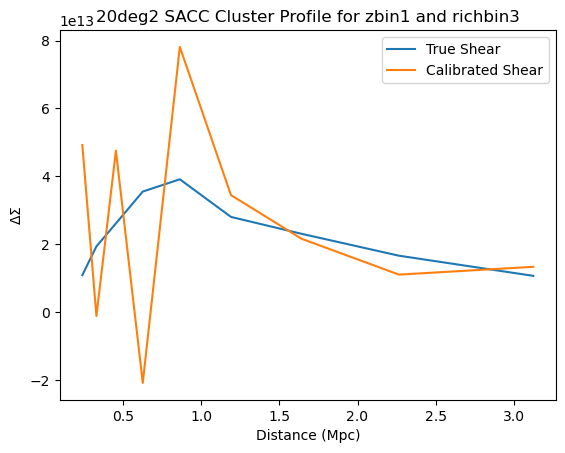

In [7]:
import sacc
sacc_file_20_true = '/sps/lsst/groups/clusters/cl_pipeline_project/TXPipe_data/cosmodc2/shear_test/outputs-20deg2-CL-True-Shear/cluster_sacc_catalog.sacc'
t1 = sacc.Sacc.load_fits(sacc_file_20_true)
t1.data
data2 = []
radius2 = []
for i in range(0,9):
    trac = ('cosmodc2-20deg2-CL', 'bin_rich_3', 'bin_z_1', f'radius_{i}')
    data2.append(t1.get_data_points(sacc.data_types.standard_types.cluster_shear, trac)[0].value)
    radius = (t1.tracers[f'radius_{i}'].upper + t1.tracers[f'radius_{i}'].lower)/2
    radius2.append(radius)
plt.plot(radius2, data2, label='True Shear')



sacc_file_20_false = '/sps/lsst/groups/clusters/cl_pipeline_project/TXPipe_data/cosmodc2/shear_test/outputs-20deg2-CL-False-Shear/cluster_sacc_catalog.sacc'
t2 = sacc.Sacc.load_fits(sacc_file_20_false)
data2 = []
radius2 = []
for i in range(0,9):
    trac = ('cosmodc2-20deg2-CL', 'bin_rich_3', 'bin_z_1', f'radius_{i}')
    data2.append(t2.get_data_points(sacc.data_types.standard_types.cluster_shear, trac)[0].value)
    radius = (t2.tracers[f'radius_{i}'].upper + t2.tracers[f'radius_{i}'].lower)/2
    radius2.append(radius)
plt.plot(radius2, data2, label='Calibrated Shear')

plt.title('20deg2 SACC Cluster Profile for zbin1 and richbin3')
plt.xlabel('Distance (Mpc)')
plt.ylabel('$\Delta \Sigma $')

plt.legend()
print(f'z_bin is [{t2.get_tracer('bin_z_1').lower}, {t2.get_tracer('bin_z_1').upper}] \n')
print(f'rich_bin is [{10*(t2.get_tracer('bin_rich_3').lower)}, {10*(t2.get_tracer('bin_rich_3').upper)}] \n')

## 440deg2

Keys: ['provenance', 'shear']
<KeysViewHDF5 ['00', '1m', '1p', '2m', '2p']>
<KeysViewHDF5 ['T', 'T_err', 'dec', 'flags', 'g1', 'g2', 'id', 'mag_err_i', 'mag_err_r', 'mag_err_z', 'mag_i', 'mag_r', 'mag_z', 'mcal_psf_T_mean', 'mcal_psf_g1', 'mcal_psf_g2', 'psf_g1', 'psf_g2', 'ra', 'redshift_true', 's2n', 'true_g1', 'true_g2', 'weight']>
{}
None


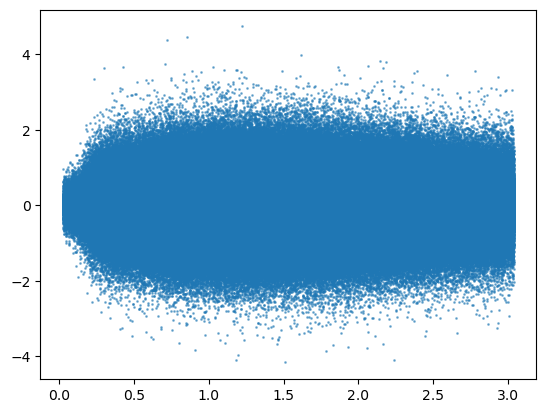

In [3]:
false_shear = '/sps/lsst/groups/clusters/cl_pipeline_project/TXPipe_data/cosmodc2/shear_test/outputs-440deg2-CL-False-Shear/cluster_shear_catalogs.hdf5'
true_shear = '/sps/lsst/groups/clusters/cl_pipeline_project/TXPipe_data/cosmodc2/shear_test/outputs-440deg2-CL-True-Shear/cluster_shear_catalogs.hdf5'



with h5py.File(true_shear, 'r') as f:
    # List all groups/datasets
    print("Keys:", list(f.keys()))
    
    # Access a dataset
    true_g1 = np.array(f['index']['g1'])
    true_distance = np.array(f['index']['distance_arcmin'])


with h5py.File(false_shear, 'r') as f:
    # List all groups/datasets
    print("Keys:", list(f['index'].keys()))
    
    # Access a dataset
    false_g1 = np.array(f['index']['g1'])
    false_distance = np.array(f['index']['distance_arcmin'])


# Convert to numpy arrays

# Plotting
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(true_distance, true_g1, s=1, color='blue', alpha=0.5)
plt.title('True Shear 440deg2')
plt.xlabel('Distance (arcmin)')
plt.ylabel('Shear g1')
plt.subplot(1, 2, 2)
plt.scatter(false_distance, false_g1, s=1, color='red', alpha=0.5)
plt.title('False Shear 440deg2')
plt.xlabel('Distance (arcmin)')
plt.ylabel('Shear g1')
plt.tight_layout()
plt.show()
# Plotting the histograms
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(true_g1, bins=50, color='blue', alpha=0.7)
plt.title('Histogram of True Shear g1')
plt.xlabel('Shear g1')
plt.ylabel('Frequency')
plt.subplot(1, 2, 2)
plt.hist(false_g1, bins=50, color='red', alpha=0.7)
plt.title('Histogram of Calibrated Shear g1')
plt.xlabel('Shear g1')

plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

### True vs False 440deg sacc

z_bin is [0.3, 0.4] 

rich_bin is [18.45098040014257, 20.0] 



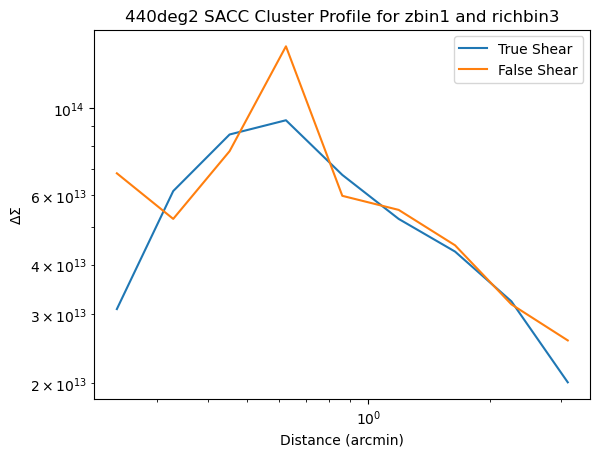

In [5]:
import sacc
sacc_file_440_true = '/sps/lsst/groups/clusters/cl_pipeline_project/TXPipe_data/cosmodc2/shear_test/outputs-440deg2-CL-True-Shear/cluster_sacc_catalog.sacc'
t1 = sacc.Sacc.load_fits(sacc_file_440_true)
t1.data
data2 = []
radius2 = []
for i in range(0,9):
    trac = ('cosmodc2-440deg2-CL', 'bin_rich_3', 'bin_z_1', f'radius_{i}')
    data2.append(t1.get_data_points(sacc.data_types.standard_types.cluster_shear, trac)[0].value)
    radius = (t1.tracers[f'radius_{i}'].upper + t1.tracers[f'radius_{i}'].lower)/2
    radius2.append(radius)
plt.plot(radius2, data2, label='True Shear')



sacc_file_440_false = '/sps/lsst/groups/clusters/cl_pipeline_project/TXPipe_data/cosmodc2/shear_test/outputs-440deg2-CL-False-Shear/cluster_sacc_catalog.sacc'
t2 = sacc.Sacc.load_fits(sacc_file_440_false)
data2 = []
radius2 = []
for i in range(0,9):
    trac = ('cosmodc2-440deg2-CL', 'bin_rich_3', 'bin_z_1', f'radius_{i}')
    data2.append(t2.get_data_points(sacc.data_types.standard_types.cluster_shear, trac)[0].value)
    radius = (t2.tracers[f'radius_{i}'].upper + t2.tracers[f'radius_{i}'].lower)/2
    radius2.append(radius)
plt.plot(radius2, data2, label='False Shear')

plt.title('440deg2 SACC Cluster Profile for zbin1 and richbin3')
plt.xlabel('Distance (arcmin)')
plt.ylabel('$\Delta \Sigma $')
plt.legend()
print(f'z_bin is [{t2.get_tracer('bin_z_1').lower}, {t2.get_tracer('bin_z_1').upper}] \n')
print(f'rich_bin is [{10*(t2.get_tracer('bin_rich_3').lower)}, {10*(t2.get_tracer('bin_rich_3').upper)}] \n')

### Constantin Data

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<Figure size 700x400 with 0 Axes>

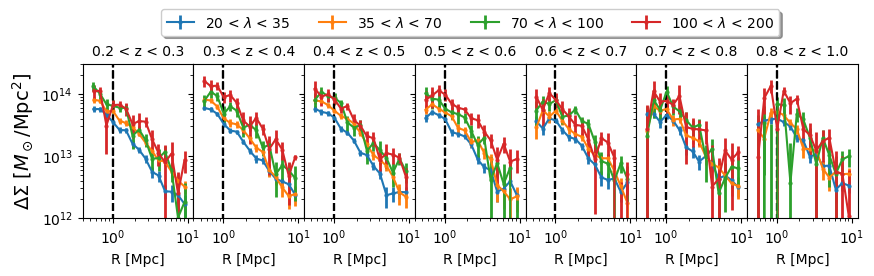

In [17]:
%load_ext autoreload
%autoreload 2
import numpy as np
import sys
import matplotlib.pyplot as plt
sys.path.append('../CLCosmo_Sim')
import _redshift_richness_bins as analysis

plt.figure(figsize=(7,4))
index = 12
fmt = ['-', '--', '.']
suff = '_full_coverage'
path_to_data = '../CLCosmo_Sim_database/data/'
data = np.load(path_to_data + f'stacked_esd_profiles_redmapper_true{suff}.pkl', allow_pickle=True)
profiles = data['stacked profile']
covariances = data['stacked covariance']
Z_bin = analysis.Z_bin
Obs_bin = analysis.Obs_bin
n_z_bin = len(Z_bin) 
n_m_bin = len(Obs_bin) 
fig, axs = plt.subplots(1,len(Z_bin), figsize = (10,2))
fig.subplots_adjust(wspace=0, hspace=0)
for i, z_bin in enumerate(Z_bin):
    for j, m_bin in enumerate(Obs_bin):

            label_z =   f'{z_bin[0]:.1f} < z < {z_bin[1]:.1f}'
            label_M = f'{m_bin[0]:.0f} < ' + r'$\lambda$' +f' < {m_bin[1]:.0f}'
            mask_z = (profiles['z_mean'] > z_bin[0])*(profiles['z_mean'] < z_bin[1])
            mask_m = (profiles['obs_mean'] > m_bin[0])*(profiles['obs_mean'] < m_bin[1])
            index = np.arange(len(profiles))
            index_cut = index[mask_m * mask_z]
            f_cut = profiles[index_cut]
            cov = np.array(covariances['cov_t'][index_cut])
            err = cov.T.diagonal()**.5
            axs[i].errorbar(f_cut['radius'][0], f_cut['gt'][0] , err[0],
                            marker = 'o',fmt = '-', elinewidth = 2,  markersize = 2, markerfacecolor = None, label = label_M)
            axs[i].set_ylim(1e12, 3e14)
            axs[i].set_xlim(0.4, 12)
            axs[i].set_xscale('log')
            axs[i].set_yscale('log')
            axs[i].vlines(1, 0, 1e19, ls='--', color='k')
            axs[i].tick_params(axis='both', which = 'major', labelsize= 10)
            #axs[0].legend(frameon = False, loc = 'upper right', fontsize = 10)
            axs[i].set_xlabel('R [Mpc]', fontsize = 10)
            axs[i].set_title(label_z, fontsize = 10)
            axs[0].set_ylabel(r'$\Delta\Sigma\ [M_\odot/$Mpc$^2]$', fontsize=14)
        #except: a=1
        
plt.legend(loc='upper center', bbox_to_anchor=(-2.5, 1.4),
          ncol=4, fancybox=True, shadow=True)

for ax in fig.get_axes():
    ax.label_outer()
#plt.savefig('../fig/stacked_redmapper_profiles.png', bbox_inches='tight', dpi=100)

## False shear 440 stacked

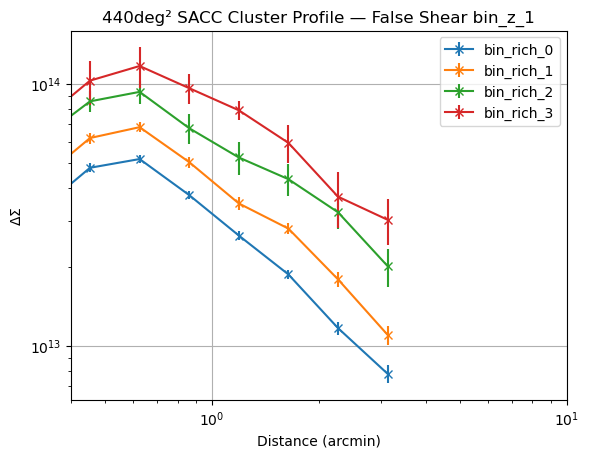

z_bin = [0.3, 0.4]
bin_rich_0 = [13.01, 15.44]
bin_rich_1 = [15.44, 18.45]
bin_rich_2 = [18.45, 20.00]
bin_rich_3 = [20.00, 23.01]


In [7]:
import sacc
import matplotlib.pyplot as plt

# File paths
sacc_file_true = '/sps/lsst/groups/clusters/cl_pipeline_project/TXPipe_data/cosmodc2/shear_test/outputs-440deg2-CL-True-Shear/cluster_sacc_catalog.sacc'
sacc_file_false = '/sps/lsst/groups/clusters/cl_pipeline_project/TXPipe_data/cosmodc2/shear_test/outputs-440deg2-CL-False-Shear/cluster_sacc_catalog.sacc'

# Load both SACC files
t_true = sacc.Sacc.load_fits(sacc_file_true)
t_false = sacc.Sacc.load_fits(sacc_file_false)

# Select fixed z bin
zbin = 'bin_z_1'

# Loop over richness bins
for rich_bin_index in range(4):
    rich_bin = f'bin_rich_{rich_bin_index}'

    data_true = []
    data_false = []
    data_true_error = []
    data_false_error = []
    radius_vals = []

    for i in range(9):
        radius_key = f'radius_{i}'
        trac = ('cosmodc2-440deg2-CL', rich_bin, zbin, radius_key)

        # Load radius (same for both files)
        radius = (t_true.tracers[radius_key].upper + t_true.tracers[radius_key].lower) / 2
        radius_vals.append(radius)
        # Load data from each file
        data_false.append(t_false.get_data_points(sacc.data_types.standard_types.cluster_shear, trac)[0].value)
        false_index = t_false.indices(sacc.data_types.standard_types.cluster_shear, trac)
        data_false_error.append(np.sqrt(t_false.covariance.covmat[false_index][:, false_index][0, 0]))
    # Plotting
    plt.errorbar(radius_vals, data_false, yerr = data_false_error, label=f'bin_rich_{rich_bin_index}', marker='x')
    plt.xlabel('Distance (arcmin)')
    plt.ylabel(r'$\Delta \Sigma$')
    plt.legend()
    plt.grid(True)

    # Optional: Save or show the plot
    # plt.savefig(f"delta_sigma_{rich_bin}_{zbin}.png")
plt.xscale('log')
plt.yscale('log')
plt.xlim(0.4, 10)
plt.title(f'440deg² SACC Cluster Profile — False Shear {zbin}')
plt.show()

# Print bin limits (same for all plots)
z_range = t_false.get_tracer(zbin)
print(f'z_bin = [{z_range.lower}, {z_range.upper}]')

for rich_bin_index in range(4):
    rich_bin = f'bin_rich_{rich_bin_index}'
    r = t_false.get_tracer(rich_bin)
    print(f'{rich_bin} = [{10*r.lower:.2f}, {10*r.upper:.2f}]')

## Comparison calibrated to constantints for false 

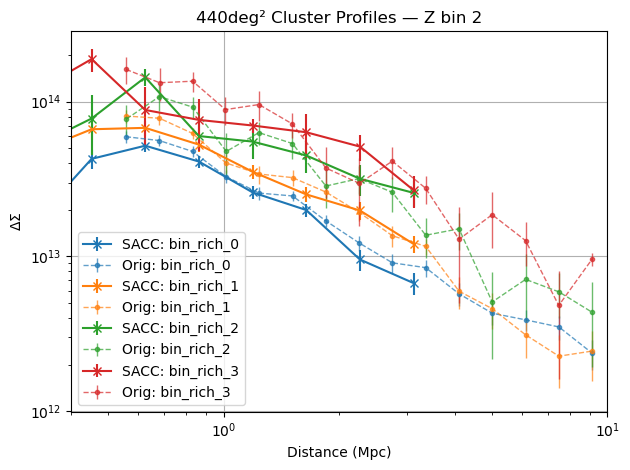

In [16]:
import matplotlib.cm as cm
import matplotlib.colors as mcolors

# Color map to ensure consistent color across both plots
cmap = plt.get_cmap('tab10')  # Or use the same cmap as your SACC plots

z_bin_index = 1  # Third z-bin
z_bin = Z_bin[z_bin_index]

# Begin loop over richness bins
for rich_bin_index in range(4):
    rich_bin = f'bin_rich_{rich_bin_index}'
    color = cmap(rich_bin_index)  # Get consistent color per bin

    data_true = []
    data_false = []
    data_true_error = []
    data_false_error = []
    radius_vals = []

    for i in range(9):
        radius_key = f'radius_{i}'
        trac = ('cosmodc2-440deg2-CL', rich_bin, zbin, radius_key)

        radius = (t_false.tracers[radius_key].upper + t_false.tracers[radius_key].lower) / 2
        radius_vals.append(radius)

        data_false.append(t_false.get_data_points(sacc.data_types.standard_types.cluster_shear, trac)[0].value)
        false_index = t_false.indices(sacc.data_types.standard_types.cluster_shear, trac)
        data_false_error.append(np.sqrt(t_false.covariance.covmat[false_index][:, false_index][0, 0]))

    # Plot SACC profile
    plt.errorbar(
        radius_vals, data_false, yerr=data_false_error,
        label=f'SACC: {rich_bin}', marker='x', color=color, linestyle='-'
    )

    # --- Overlay original profile (dashed line) from Z_bin[2] ---
    m_bin = Obs_bin[rich_bin_index]
    mask_z = (profiles['z_mean'] > z_bin[0]) & (profiles['z_mean'] < z_bin[1])
    mask_m = (profiles['obs_mean'] > m_bin[0]) & (profiles['obs_mean'] < m_bin[1])
    index_cut = np.where(mask_z & mask_m)[0]

    if len(index_cut) > 0:
        f_cut = profiles[index_cut]
        cov = np.array(covariances['cov_t'][index_cut])
        err = cov.T.diagonal()**0.5
        plt.errorbar(
            f_cut['radius'][0], f_cut['gt'][0], err[0],
            label=f'Orig: bin_rich_{rich_bin_index}', fmt='--', color=color,
            elinewidth=1, linewidth=1, markersize=3, marker='o', alpha=0.7
        )
plt.xlabel('Distance (Mpc)')
plt.ylabel(r'$\Delta \Sigma$')
plt.title(f'440deg² Cluster Profiles — Z bin {z_bin_index + 1}')
plt.xscale('log')
plt.yscale('log')
plt.xlim(0.4, 10)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

